In [68]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from keras.callbacks import EarlyStopping

In [69]:
import tensorflow as tf

In [37]:
cwd = os.getcwd()

# Using Imgdatagenerator to generate data and training

In [53]:
# create data genrators
train_datagen = ImageDataGenerator(rescale = 1/255) # change RGB of the image to 0-1
validation_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
        cwd + '/gochiusa/main_dataset/main_dataset/',
        target_size = (300, 300),
        batch_size = 32,
        class_mode = 'categorical'
)

validation_generator = validation_datagen.flow_from_directory(
        cwd + '/gochiusa/test_dataset/test_dataset/',
        target_size = (300, 300),
        batch_size = 32,
        class_mode = 'categorical'
)

Found 59579 images belonging to 9 classes.
Found 3897 images belonging to 9 classes.


In [62]:
model = Sequential([

    Conv2D(16, (3,3), activation = 'relu', input_shape = (300, 300, 3), padding = "same"),
    Dropout(0.20),
    MaxPool2D(2),
    
    Conv2D(32, (3,3), activation = 'relu', padding = "same"),
    Dropout(0.20),
    MaxPool2D(2),
    
    Conv2D(64, (3,3), activation = 'relu', padding = "same"),
    Dropout(0.20),
    MaxPool2D(2),
    
    Flatten(),
    
    Dense(128, activation = 'relu'),
    Dense(9, activation = 'softmax')
])

In [35]:
model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics = ['accuracy'])

In [52]:
history = model.fit(
    train_generator,
    epochs = 3,
    verbose = 1,
    validation_data = validation_generator,
    validation_steps = 8
)

Epoch 1/3


ValueError: in user code:

    C:\Users\chenq\anaconda3\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\chenq\anaconda3\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\chenq\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\chenq\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\chenq\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\chenq\anaconda3\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Users\chenq\anaconda3\lib\site-packages\keras\engine\training.py:788 train_step
        loss = self.compiled_loss(
    C:\Users\chenq\anaconda3\lib\site-packages\keras\engine\compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\chenq\anaconda3\lib\site-packages\keras\losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\chenq\anaconda3\lib\site-packages\keras\losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\chenq\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\chenq\anaconda3\lib\site-packages\keras\losses.py:1665 categorical_crossentropy
        return backend.categorical_crossentropy(
    C:\Users\chenq\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\chenq\anaconda3\lib\site-packages\keras\backend.py:4839 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\chenq\anaconda3\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 9) are incompatible


In [30]:
model.save(cwd + "/my_second_model") # save the model into a directory

INFO:tensorflow:Assets written to: C:\Users\chenq\Desktop\machine learning\web_scraping\anime_img/my_second_model\assets


In [31]:
model.save_weights("gochiusa_classifier_2.h5") # save weights of a model

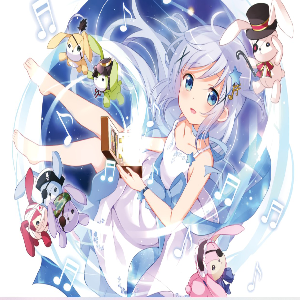

In [28]:
# load a sample img for testing
test_img = tf.keras.utils.load_img(
    cwd + "//test_chino3_full.jpg", grayscale=False, color_mode='rgb', target_size=(300, 300, 3),
    interpolation='nearest'
)
test_img

In [29]:
# be aware model requires a 4 dimantional input shape, 
#(number_of_imgs, size(horizontal), size(vertical), channels(e.g an rgb img have 3 channels))
test_img_array = tf.keras.utils.img_to_array(test_img)
test_img_array = test_img_array.reshape(1, 300, 300, 3)
test_img_array.shape

(1, 300, 300, 3)

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 298, 298, 64)      1792      
_________________________________________________________________
dropout_3 (Dropout)          (None, 298, 298, 64)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 147, 147, 16)      9232      
_________________________________________________________________
dropout_4 (Dropout)          (None, 147, 147, 16)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 85264)            

In [26]:
model.input_shape

(None, 300, 300, 3)

In [27]:
model.predict(test_img_array)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [9]:
# load saved model
my_model = tf.keras.models.load_model(
    cwd + "/my_first_model", custom_objects=None, compile=True, options=None
)

In [10]:
my_model.predict(test_img_array)

array([[4.3694074e-03, 4.9389210e-01, 9.7648194e-04, 2.2252578e-02,
        4.4597098e-01, 4.5344955e-03, 1.2633686e-07, 2.7881494e-02,
        1.2233206e-04]], dtype=float32)

In [23]:
for img in os.listdir("testimgs_chino"):
    # load a sample img for testing
    test_img = tf.keras.utils.load_img(
        cwd + "/testimgs_chino/" + img, grayscale=False, color_mode='rgb', target_size=(300, 300, 3),
        interpolation='nearest'
    )
    # be aware model requires a 4 dimantional input shape, 
    #(number_of_imgs, size(horizontal), size(vertical), channels(e.g an rgb img have 3 channels))
    test_img_array = tf.keras.utils.img_to_array(test_img) / 255
    test_img_array = test_img_array.reshape(1, 300, 300, 3)
    prediction = my_model.predict(test_img_array)
    #print(prediction)
    print(max(prediction[0]) == prediction[0][1])

False
True
True
True
False
False
True
False
True
False
True
True
True
False
False
False
False
False


In [ ]:
for img in os.listdir("testimgs_chino_faces"):
    # load a sample img for testing
    test_img = tf.keras.utils.load_img(
        cwd + "/testimgs_chino_faces/" + img, grayscale=False, color_mode='rgb', target_size=(300, 300, 3),
        interpolation='nearest'
    )
    # be aware model requires a 4 dimantional input shape, 
    #(number_of_imgs, size(horizontal), size(vertical), channels(e.g an rgb img have 3 channels))
    test_img_array = tf.keras.utils.img_to_array(test_img) 
    test_img_array = test_img_array.reshape(1, 300, 300, 3)
    #prediction = model.predict(test_img_array)
    prediction = my_model.predict(test_img_array)
    #print(prediction)
    print(max(prediction[0]) == prediction[0][1])

# Another way for preparing data and train the model.

Train a simple gochiusa character classifier. Processes: preprocess the data to image dataset -> create the sekeleton of the model(add layers, maxpool, etc) -> compile -> fit data into model -> using test set to evaluate model -> use the model to test data form real world -> save. 

In [58]:
# another way of preprocessing data
batch_size = 32
img_height = 300
img_width = 300

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  cwd + "/gochiusa/main_dataset/main_dataset/",
  label_mode = "categorical",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 59579 files belonging to 9 classes.
Using 47664 files for training.


In [59]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  cwd + "/gochiusa/main_dataset/main_dataset/",
  label_mode = "categorical",  
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 59579 files belonging to 9 classes.
Using 11915 files for validation.


In [40]:
class_names = train_ds.class_names
print(class_names)

['Blue Mountain', 'Chino', 'Chiya', 'Cocoa', 'Maya', 'Megumi', 'Mocha', 'Rize', 'Sharo']


In [70]:
num_classes = 9

model = Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPool2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPool2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation = 'softmax')
])

In [72]:
model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics = ['accuracy'])
early_stopping_monitor = EarlyStopping(patience = 2)

In [74]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  callbacks = [early_stopping_monitor],  
  verbose = 1,
  epochs=epochs,
  validation_steps = 8  
)

Epoch 1/10
1490/1490 [==============================] - 2646s 2s/step - loss: 0.1982 - accuracy: 0.9415 - val_loss: 0.0636 - val_accuracy: 0.9805
Epoch 2/10
1490/1490 [==============================] - 2804s 2s/step - loss: 0.0518 - accuracy: 0.9849 - val_loss: 0.0508 - val_accuracy: 0.9883
Epoch 3/10
1490/1490 [==============================] - 2481s 2s/step - loss: 0.0317 - accuracy: 0.9906 - val_loss: 0.0413 - val_accuracy: 0.9844
Epoch 4/10
1490/1490 [==============================] - 2199s 1s/step - loss: 0.0335 - accuracy: 0.9904 - val_loss: 0.0676 - val_accuracy: 0.9688
Epoch 5/10
1490/1490 [==============================] - 2744s 2s/step - loss: 0.0234 - accuracy: 0.9933 - val_loss: 0.0532 - val_accuracy: 0.9922


In [75]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  cwd + "/gochiusa/test_dataset/test_dataset/",
  label_mode = "categorical",  
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3897 files belonging to 9 classes.


In [76]:
model.evaluate(test_ds)

122/122 [==============================] - 74s 596ms/step - loss: 0.6263 - accuracy: 0.9081


[0.6263025403022766, 0.9081344604492188]

In [85]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 300, 300, 3)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 300, 300, 16)      448       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 150, 150, 16)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 150, 150, 32)      4640      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 37, 37, 64)       

In [84]:
for img in os.listdir("testimgs_chino_faces"):
    # load a sample img for testing
    test_img = tf.keras.utils.load_img(
        cwd + "/testimgs_chino_faces/" + img, grayscale=False, color_mode='rgb', target_size=(300, 300, 3),
        interpolation='nearest'
    )
    # be aware model requires a 4 dimantional input shape, 
    #(number_of_imgs, size(horizontal), size(vertical), channels(e.g an rgb img have 3 channels))
    test_img_array = tf.keras.utils.img_to_array(test_img)
    test_img_array = test_img_array.reshape(1, 300, 300, 3)
    #prediction = model.predict(test_img_array)
    prediction = model.predict(test_img_array)
    #print(prediction)
    print(max(prediction[0]) == prediction[0][1])

False
False
False
True
False
False
False
False
False
False
False
False
False
False
True
True
False


In [86]:
model.save(cwd + "/my_third_model") # save the model into a directory

INFO:tensorflow:Assets written to: C:\Users\chenq\Desktop\machine learning\web_scraping\anime_img/my_third_model\assets
